# 1) Problem Definition

__Project Summary:__

The data consisted of 345 observations and was provided by the University of California, Irvine. The training dataset consisted of 90% of the data and was used to optimize the perceptron feature weights through stochastic gradient descent. The testing dataset was composed of the remaining 10% and was used to evaluate the performance of the model on new data. Initially, all of the features within the Bupa dataset were used to establish a baseline. Further runs were conducted on a subset of the original dataset reduced to the following features: alkaline phosphatase, aspartate aminotransferase, and gamma-glutamyl transpeptidase.

__Goal:__

The purpose of this project was to develop a perceptron model that can accurately predict the presence of liver disorders. The model was developed using data comprised of blood tests and alcohol consumption levels acquired by BUPA Medical Research Ltd. 

__Heilmeier’s Catechism:__
- What are you trying to do? Articulate your objectives using absolutely no jargon. 
- How is it done today, and what are the limits of current practice? 
- What is new in your approach and why do you think it will be successful? 
- Who cares? If you are successful, what difference will it make? 
- What are the risks? 
- How much will it cost? 
- How long will it take? 
- What are the mid-term and final “exams” to check for success?


__References:__
- https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
- https://maviccprp.github.io/a-perceptron-in-just-a-few-lines-of-python-code/

# 2) Data Gathering

__Dataset Link:__

https://archive.ics.uci.edu/ml/datasets/liver+disorders

# 3) Data Processing

Data Cleaning Assumptions:

In [74]:
# convert catagorical data to numeric

# System information and import libraries

#load packages
import sys
print("Python version: {0}".format(sys.version))

import pandas as pd
import numpy as np
from scipy.io import arff
import math

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from mlxtend.plotting import category_scatter
%matplotlib inline

import seaborn as sns


Python version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [75]:
# Attribute Information:

# FEATURES
# 1. mcv: mean corpuscular volume
# 2. alkphos: alkaline phosphotase
# 3. sgpt: alanine aminotransferase*
# 4. sgot: aspartate aminotransferase*
# 5. gammagt: gamma-glutamyl transpeptidase
# 6. drinks: number of half-pint equivalents of alcoholic beverages drunk per day

# LABELS
# 7. selector field created by the BUPA researchers to split the data into train/test sets

In [76]:
data = arff.loadarff('./dataset_8_liver-disorders.arff')
df = pd.DataFrame(data[0])

df['selector'] = df['selector'].astype('str') 
print(df.dtypes)

df.head()

mcv         float64
alkphos     float64
sgpt        float64
sgot        float64
gammagt     float64
drinks      float64
selector     object
dtype: object


,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85.0,92.0,45.0,27.0,31.0,0.0,b'1'
1,85.0,64.0,59.0,32.0,23.0,0.0,b'2'
2,86.0,54.0,33.0,16.0,54.0,0.0,b'2'
3,91.0,78.0,34.0,24.0,36.0,0.0,b'2'
4,87.0,70.0,12.0,28.0,10.0,0.0,b'2'


In [77]:
# replace 'selector' column string values with numeric
df.loc[df['selector'] == "b'1'", 'selector'] = 0.0
df.loc[df['selector'] == "b'2'", 'selector'] = 1.0

#confirm the changes were made
print(df.dtypes)

mcv         float64
alkphos     float64
sgpt        float64
sgot        float64
gammagt     float64
drinks      float64
selector      int64
dtype: object


In [78]:
# custom min-max normalization function
def max_min_norm(dataframe):
    df_norm = dataframe
    for feature_name in df.columns:
        df_norm[feature_name]=(df[feature_name]-df[feature_name].min())/(df[feature_name].max()-df[feature_name].min())
    return df_norm

#custom dataframe shuffle and train/test datafram splitting function
def shuffle_df(df,label,test_size):
    
    df_norm = max_min_norm(df)
    
    df_shuffled = df_norm.reindex(np.random.permutation(df_norm.index))
     
    num_of_rows = len(df) * test_size
    num_of_rows_round = math.ceil(num_of_rows)

    df_train = df_shuffled.iloc[:num_of_rows_round] #indexes rows for training data
    X_train = df_train.drop(label, axis=1) #drop label column
    y_train = df_train.loc[:, [label]] #retain a single column pandas dataframe
    df_test = df_shuffled.iloc[num_of_rows_round:] #indexes rows for test data
    X_test = df_test.drop(label, axis=1) #drop label column
    y_test = df_test.loc[:, [label]] #retain a single column pandas dataframe

    # convert the dataframes to numpy matricies
    df_train_m = df_train.values
    X_train_m = X_train.values
    y_train_m = y_train.values
    df_test_m = df_test.values
    X_test_m = X_test.values
    y_test_m = y_test.values  
    
    return df_train_m,X_train_m,y_train_m,df_test_m,X_test_m,y_test_m


# 4) Exploratory Data Analysis (EDA)

/Users/chriswhite/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chriswhite/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/chriswhite/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/chriswhite/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

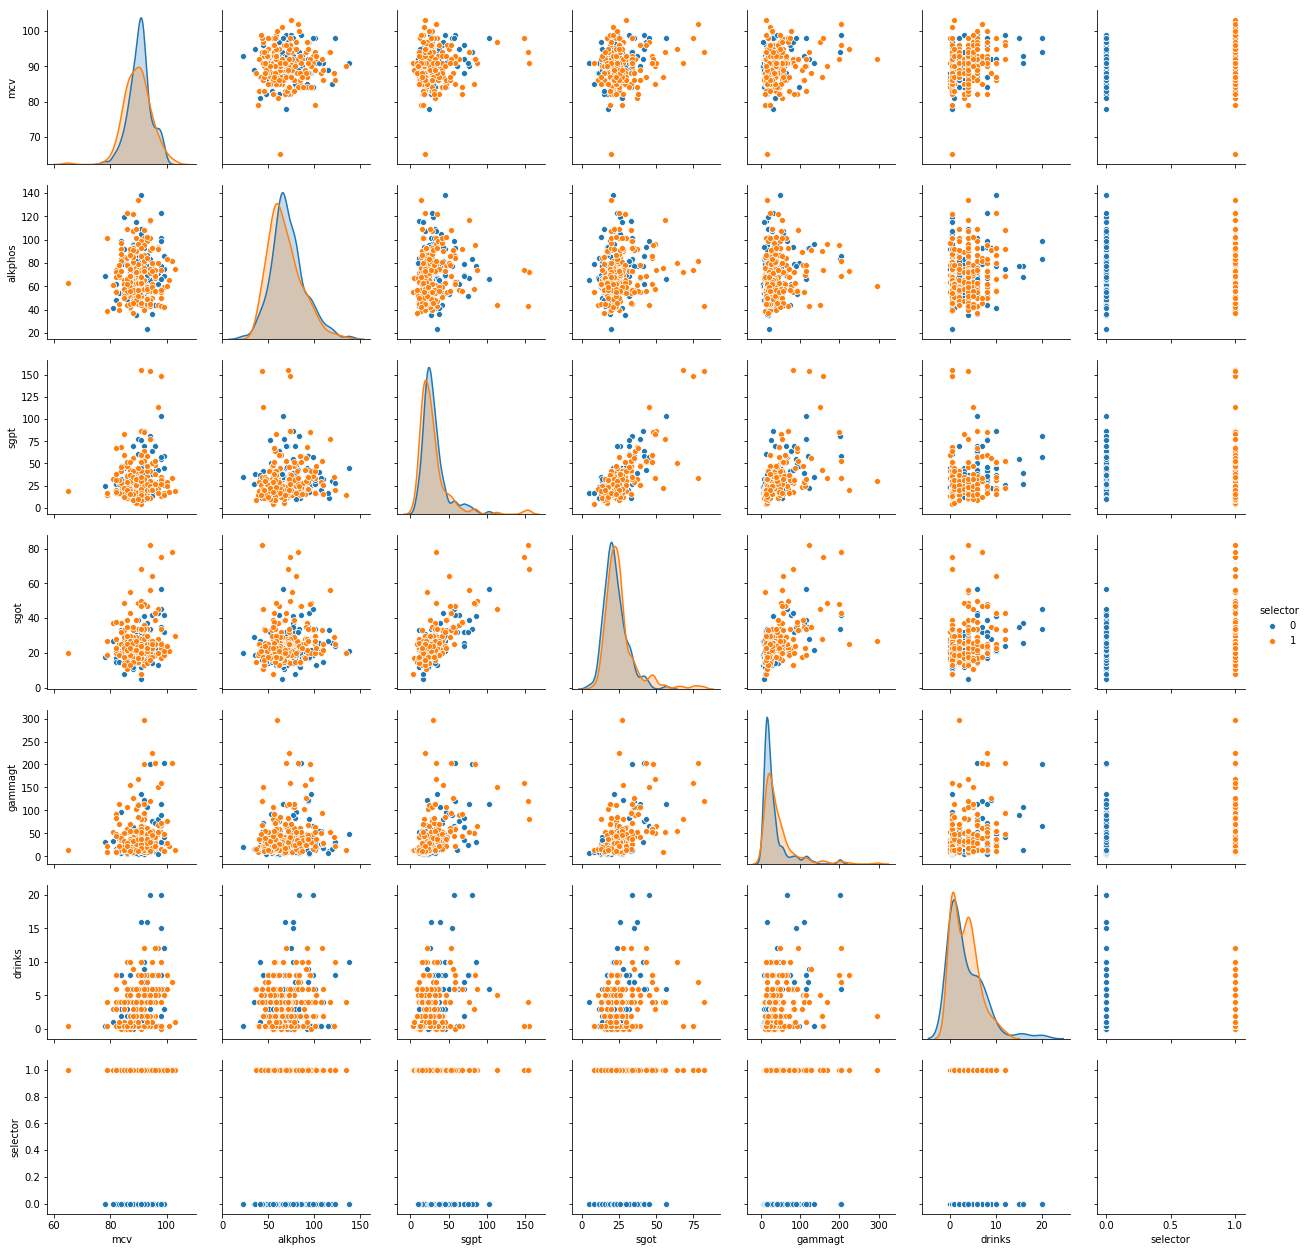

In [79]:
#visualize the relationships between each feature
sns.pairplot(data=df, hue='selector', diag_kind='kde');
plt.show()

In [80]:
# generate distribution statistics
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,0.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,0.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,1.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,1.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,1.000000


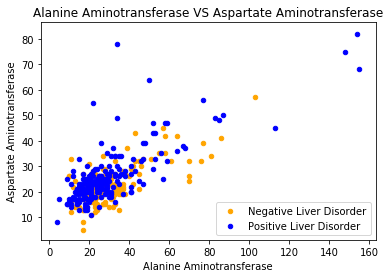

In [81]:
# visualize 2 features that are not linearly separable
fig = df[df['selector'] == 0].plot(kind='scatter',x='sgpt',y='sgot', color='orange',label='Negative Liver Disorder')
df[df['selector'] == 1].plot(kind='scatter',x='sgpt',y='sgot', color='blue', label='Positive Liver Disorder', ax=fig)

fig.set_xlabel("Alanine Aminotransferase")
fig.set_ylabel("Aspartate Aminotransferase")
fig.set_title("Alanine Aminotransferase VS Aspartate Aminotransferase")
fig=plt.gcf()

plt.show()

# 5) Data Modeling

In [82]:
# generate a prediction based on the weights returns a +1 or -1 for each row, based on the sum 
# of the feature values * weights

# step activation perceptron prediction function
def prediction(row, weights):
    # initialize first value of the activation as the first value of the weight array
    activation = weights[0]
    # sum each feature value * respective weight
    for i in range(len(row) - 1):
        # bias + (w1 * x1) + (w2 * x2) + ...  
        activation += weights[i + 1] * row [i]
#     if the sum is greater or equal to 0, the perceptron fires a positive response  
    if activation >= 0:
        return 1
    else:
        return 0
    
# Perceptron Algorithm With Stochastic Gradient Descent
# predictions on testing dataset and accuracy metric generation
# using the step activation function
def perceptron(df, weights):
    predictions = []
    correct = 0
    for row in df:
        prediction_test = prediction(row, weights)
        predictions.append(prediction_test)
        
        if row[-1] == prediction_test:
            correct += 1
        
    accuracy = correct / len(predictions) * 100.0
    return predictions, accuracy

# sigmoid activation perceptron prediction function
def prediction_sig_fun(row, weights):
    # initialize first value of the activation as the first value
    # of the weight array
    activation = weights[0]

    # sum each feature value * respective weight
    for i in range(len(row) - 1):
        # bias + (w1 * x1) + (w2 * x2) + ...  
        activation += weights[i + 1] * row [i]
    # sigmoid function 
    return 1/ (1+np.exp(-activation))


def perceptron_sig(df, weights):
    actuals = []
    predictions = []
    
    correct = 0
    
    for row in df:
        prediction_test = prediction_sig_fun(row, weights)
        predictions.append(prediction_test)
#         actuals.append(row[-1])
        if row[-1] == prediction_test:
            correct += 1
    return predictions
    
# https://stackoverflow.com/questions/2762215/parameter-tuning-for-perceptron-learning-algorithm

# Perceptron Algorithm With Stochastic Gradient Descent
# predictions on testing dataset and accuracy metric generation
# using the sigmoid activation function

def sgd_weight_training(df,learn_rate,epochs,itera):
    for j in range(itera):
     
        # manually saved best performing initial weights array
        # print('length of custom weights array:' + str(len(weights_array))) 
        weights_array = [-0.7936353080623508, -2.4367710774020113, 0.28266577459930364, -1.3409608754746052]
#         print("weights_array " + str(weights_array))
        
        final_errors = []
        final_epochs = []
        final_accuracy_score = []
        print("processing set: " + str(j))
  
        df_train,X_train,y_train,df_test,X_test,y_test = shuffle_df(df,label = 'selector', test_size = 0.9)  

        errors = []
        epochs_array = []
        for epoch in range(epochs):
            sum_error = 0.0

            for row in df_train:
                prediction_test = prediction(row, weights_array)

                error = row[-1] - prediction_test
                sum_error += error**2

                weights_array[0] = weights_array[0] + learn_rate * error
                for i in range(len(row)-1):
                    weights_array[i + 1] = weights_array[i + 1] + learn_rate * error * row[i]
                  
    #         append error values onto array for plot
            errors.append(sum_error) 
            epochs_array.append(epoch)
            
    #         print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learn_rate, sum_error))
        
        
        final_errors.append(errors)
        final_epochs.append(epochs_array)
        
        # run the algorithm on test set
        predictions_class, accuracy_score = perceptron(df_test, weights_array)
        final_accuracy_score.append(accuracy_score)  
    
#         confidence metric
        sig_confidence = perceptron_sig(df_test, weights_array)

        if (j == 0):
            df_holder_base = pd.DataFrame(np.transpose(final_errors),columns =[str(j)])
            
            df_acc_base = pd.DataFrame(np.transpose(final_accuracy_score),columns =[str(j)])
            
            abc = np.transpose(np.array(y_test).ravel().tolist())
            df_test_pred_confid_base = pd.DataFrame({'classification':np.transpose(predictions_class), 'confidence':np.transpose(sig_confidence), 'actual':abc})    

        else:
            df_holder_add = pd.DataFrame(np.transpose(final_errors),columns =[str(j)])
            df_holder_base = pd.merge(df_holder_base, df_holder_add, left_index=True, right_index=True)
            
            df_acc_add = pd.DataFrame(np.transpose(final_accuracy_score),columns =[str(j)])
            df_acc_base = pd.merge(df_acc_base, df_acc_add, left_index=True, right_index=True)  
        
            abc = np.transpose(np.array(y_test).ravel().tolist())
            df_test_pred_confid_add = pd.DataFrame({'classification':np.transpose(predictions_class), 'confidence':np.transpose(sig_confidence), 'actual':abc})    

            df_test_pred_confid_base=df_test_pred_confid_base.append(df_test_pred_confid_add)
                   
        plt.plot(errors)
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        plt.title('Epoch vs Total Loss @ learning rate = ' + str(learn_rate))



    return weights_array,df_holder_base,df_acc_base,df_test_pred_confid_base


processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
processing set: 9
processing set: 10
processing set: 11
processing set: 12
processing set: 13
processing set: 14
processing set: 15
processing set: 16
processing set: 17
processing set: 18
processing set: 19
processing set: 20
processing set: 21
processing set: 22
processing set: 23
processing set: 24
processing set: 25
processing set: 26
processing set: 27
processing set: 28
processing set: 29
processing set: 30
processing set: 31
processing set: 32
processing set: 33
processing set: 34
processing set: 35
processing set: 36
processing set: 37
processing set: 38
processing set: 39
processing set: 40
processing set: 41
processing set: 42
processing set: 43
processing set: 44
processing set: 45
processing set: 46
processing set: 47
processing set: 48
processing set: 49


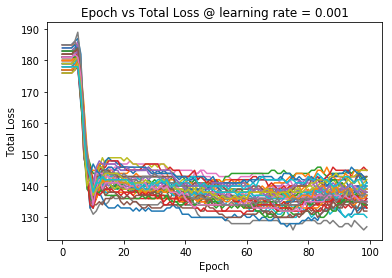

In [83]:
# run the algorithm using the top 4 most significant features

# df_subset = df[['alkphos','sgot','gammagt','selector']]
# df_subset = df[['mcv','alkphos','sgpt','sgot','gammagt','drinks','selector']]
df = df[['alkphos','sgot','gammagt','selector']]

# learning rate: used to limit the amount each weight is adjusted each time it is updated 
learn_rate  = .001
# epochs: number of times to run through the training data while 
epochs   =  100

itera = 50
weights_array,df_holder_test,df_acc_add_test,df_test_pred_confid_test = sgd_weight_training(df,
                                                                                            learn_rate,
                                                                                            epochs,
                                                                                            itera)

In [84]:
# determine average total loss over the 50 perceptron iterations
df_acc_add_test['avg'] = df_acc_add_test.mean(axis=1)

overall_accuracy = df_acc_add_test['avg']

print("perceptron total loss averaged over 50 iterations: " + str(df_acc_add_test['avg'].iloc[0]))

perceptron total loss averaged over 50 iterations: 56.47058823529412


In [85]:
df_holder_test['avg'] = df_holder_test.mean(axis=1)
df_holder_test.head(20)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,avg
0,177.0,180.0,181.0,177.0,183.0,177.0,184.0,180.0,181.0,182.0,...,177.0,183.0,182.0,181.0,182.0,181.0,176.0,176.0,178.0,180.52
1,177.0,180.0,181.0,177.0,183.0,177.0,184.0,180.0,181.0,182.0,...,177.0,183.0,182.0,181.0,182.0,181.0,176.0,176.0,178.0,180.52
2,177.0,180.0,181.0,177.0,183.0,177.0,184.0,180.0,181.0,182.0,...,177.0,183.0,182.0,181.0,182.0,181.0,176.0,176.0,178.0,180.52
3,177.0,180.0,181.0,177.0,183.0,177.0,184.0,180.0,181.0,182.0,...,177.0,183.0,182.0,181.0,182.0,181.0,176.0,176.0,178.0,180.52
4,177.0,181.0,182.0,178.0,183.0,177.0,186.0,181.0,182.0,182.0,...,178.0,183.0,183.0,182.0,183.0,182.0,177.0,177.0,178.0,181.30
5,178.0,182.0,182.0,178.0,186.0,179.0,183.0,182.0,183.0,183.0,...,180.0,183.0,183.0,183.0,184.0,181.0,179.0,179.0,178.0,181.82
6,166.0,176.0,172.0,169.0,178.0,173.0,172.0,172.0,175.0,177.0,...,169.0,167.0,175.0,170.0,174.0,175.0,168.0,172.0,170.0,172.36
7,161.0,166.0,156.0,149.0,161.0,158.0,160.0,151.0,158.0,153.0,...,160.0,155.0,160.0,161.0,152.0,154.0,159.0,156.0,156.0,156.72
8,145.0,142.0,144.0,145.0,148.0,146.0,144.0,145.0,148.0,142.0,...,142.0,141.0,143.0,150.0,147.0,142.0,151.0,140.0,146.0,144.92
9,142.0,141.0,140.0,138.0,141.0,143.0,142.0,133.0,142.0,137.0,...,139.0,136.0,134.0,141.0,140.0,141.0,144.0,143.0,143.0,140.60


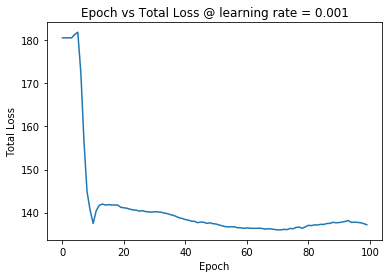

In [86]:
plt.plot(df_holder_test['avg'])
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Epoch vs Total Loss @ learning rate = 0.001');

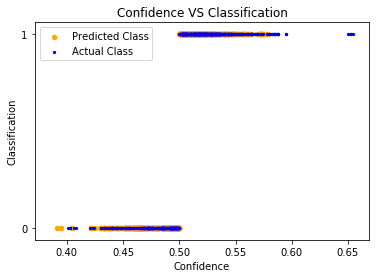

In [87]:
# plot prediciton confidence using the sigmoid function and plot the confidence vs classification for both predicted and actual classes
fig = df_test_pred_confid_test[df_test_pred_confid_test['actual'] == 0].plot(kind='scatter',x='confidence',y='classification', color='orange',s=20, label='Predicted Class')
df_test_pred_confid_test[df_test_pred_confid_test['actual'] == 1].plot(kind='scatter',x='confidence',y='classification', color='blue', s=5, label='Actual Class', ax=fig)

fig.set_xlabel("Confidence")
fig.set_ylabel("Classification")
fig.set_title("Confidence VS Classification")
fig=plt.gcf()
# fig.set_size_inches(10,6)
plt.yticks(np.arange(min(df_test_pred_confid_test['classification']), max(df_test_pred_confid_test['classification'])+1, 1.0))

plt.show()

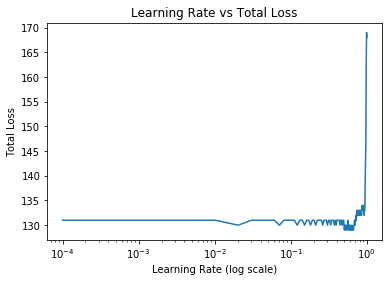

In [91]:
# observe what happens when perceptron algorithm is run using a range of learning rates
def sgd_weight_training_range(df4,weights_array,learning_array):

    errors = []
    for learn in learning_array:
        sum_error = 0.0 
        for row in df4:
            prediction_test = prediction(row, weights_array)
            
            error = row[-1] - prediction_test
            sum_error += error**2

            weights_array[0] = weights_array[0] + learn_rate * error
            for i in range(len(row)-1):
                weights_array[i + 1] = weights_array[i + 1] + learn_rate * error * row[i]
        
#         append error values onto array for plot
        errors.append(sum_error)
#         print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learn_rate, sum_error))

    plt.semilogx(learning_array,errors)
    plt.xlabel('Learning Rate (log scale)')
    plt.ylabel('Total Loss')
    plt.title('Learning Rate vs Total Loss')
     
    return weights_array


df_subset = df[['alkphos','sgot','gammagt','selector']]

df_train,X_train,y_train,df_test,X_test,y_test = shuffle_df(df_subset,label = 'selector', test_size = 0.9)

# learning rate: used to limit the amount each weight is adjusted each time it is updated 

min_learning_rate = 1
max_learning_rate = 0.0001
learning_array = np.linspace(min_learning_rate,max_learning_rate,100).tolist()
weights = [-0.7620182255847036, -0.8707501092386477, 2.229215179126817, -0.0028937094908138075, -1.107535333717221, -0.06808528686527142, -0.09585144532617014]

weights_array_test = sgd_weight_training_range(df_train,weights,learning_array)


